In [1]:
from skimage.feature import hog
from skimage import data,exposure
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [17]:
#reads the image from the disk and modify
image=cv2.imread('Cat.jpg')
image3= cv2.imread('president.jpg')
image4=cv2.imread('Kamala.jpg')


In [3]:
#used for multichannel in hog
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


In [4]:
#fd is the feature descriptor used to describe the image
fd,hog_image=hog(image,orientations=8,pixels_per_cell=(16,16), cells_per_block=(1,1),
                 visualize=True, multichannel=True)


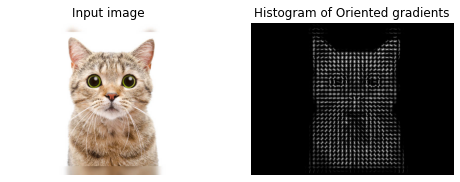

In [5]:

#plot input and hog image
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input image')

#rescale histogram for better diplay
hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented gradients')
plt.show()



In [6]:
image.shape

(599, 800, 3)

Face Detection

In [7]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 32kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=353bf0276519353cbe09dee5aa448a27fc358227b5d0ec7d0bd5de9dc7fb638b
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


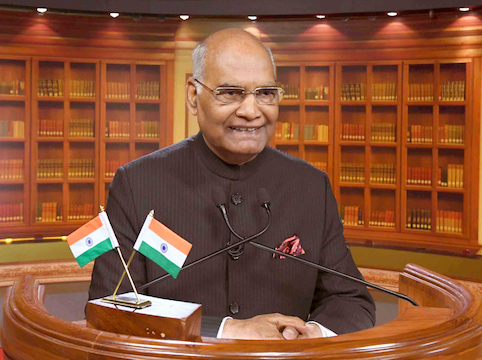

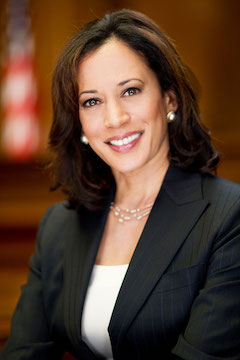

In [18]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from google.colab.patches import cv2_imshow
import face_recognition
%matplotlib inline

image3= cv2.imread('president.jpg')
# image3=cv2.cvtColor(image3,cv2.COLOR_BGR2RGB)
cv2_imshow(image3)

image4=cv2.imread('kamala.jpg')
# image4=cv2.cvtColor(image4,cv2.COLOR_BGR2RGB)
cv2_imshow(image4)




In [19]:
from google.colab.patches import cv2_imshow
# cv2_imshow(img)

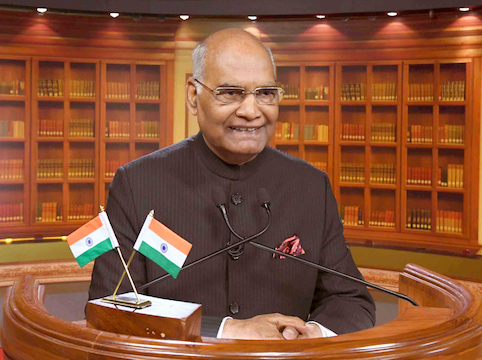

In [20]:
# !curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(image3)

In [21]:

#to find all the images in the picture
face_locations= face_recognition.face_locations(image3)
number_of_faces=len(face_locations)
print('found {} faces at input image.'.format(number_of_faces))


found 1 faces at input image.


In [22]:
face_locations2=face_recognition.face_locations(image4)
number_of_faces_in_kamala=len(face_locations2)
print('found {} faces at input image.'.format(number_of_faces_in_kamala))


found 1 faces at input image.


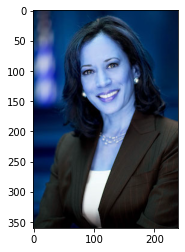

In [23]:
#get axis handle
plt.imshow(image4)
ax=plt.gca()

In [24]:

#repeat for all the faces round
for face_location in face_locations2:
    
    #print the location of each face in this image. Each face is a list of coordinates in 
    #(top, right, bottom, left)order.
    top, right,bottom,left =face_location
    x,y,w,h=left,top, right, bottom
    print("A face is located at the pixel location top:{}, left:{}, right:{}, bottom:{}".format(x,y,w,h))
    
    #now, let's draw a box around the face
    rect=Rectangle((x,y),w-x,h-y,fill=False,color='red')
    ax.add_patch(rect)
plt.show()


A face is located at the pixel location top:67, left:68, right:175, bottom:175


FACE RECOGNITION

In [26]:

#load the known images
image5=cv2.imread('apj.jpg')
apj=cv2.cvtColor(image5,cv2.COLOR_BGR2RGB)

image6=cv2.imread('modi.jpg')
modi=cv2.cvtColor(image6, cv2.COLOR_BGR2RGB)

image7=cv2.imread('putin.jpg')
putin=cv2.cvtColor(image7, cv2.COLOR_BGR2RGB)


In [27]:
#to get the face encoding of each person

apj_demo_encoding=face_recognition.face_encodings(apj)[0]
modi_demo_encoding= face_recognition.face_encodings(modi)[0]
putin_demo_encodings=face_recognition.face_encodings(putin)[0]


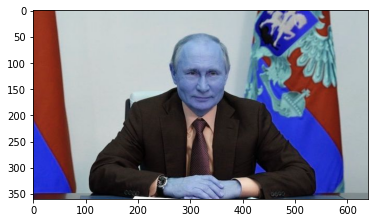

In [29]:
#creating a database for all the known images
known_faces=[apj_demo_encoding,modi_demo_encoding,putin_demo_encodings]

#loading the image on which we want to check
image=cv2.imread('putin.jpg')
testing_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

testing_image_face_encodings=face_recognition.face_encodings(testing_image)

In [30]:
    
#now we will compute the distance using scipy library
from scipy.spatial import distance

#there can be n number of photos so we need to loop on each face
for testing_image_face_encoding in testing_image_face_encodings:
    
    #test if the unknown face encodings matches any of the three faces
        results=[]
    
    for known_face_encodings in known_faces:
        d=distance.euclidean(known_face_encodings,testing_image_face_encoding)
        
        #printing the euclidean distance now!
        results.append(d)
    threshold=0.6
    results=np.array(results) <= threshold
    
    name="Testing"
    
    if results[0]:
        name="Apj Abdul kalam"
    elif results[1]:
        name="Narendra modi"
    elif results[2]:
        name="Putin"
    print(f"Found {name} in the photo")
    


Found Putin in the photo


FINDING ALL THE FACIAL LANDMARKS

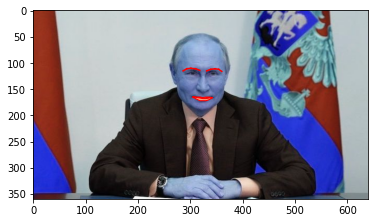

In [31]:
face_landmark_list=face_recognition.face_landmarks(image)

import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(image)
ax=plt.gca()


for face_landmarks in face_landmark_list:
    #this model returns the features like chin, left_eyebrow, nose_bridge, nose_tip, left_eye,
    #right_eye, top_lip, bottom_lip
    
    #drawing a line over the eyebrows
    left_eyebrow_points= face_landmarks['left_eyebrow']
    pre_x, pre_y= left_eyebrow_points[0];
    
    for (x,y) in left_eyebrow_points[1:]:
        l=mlines.Line2D([pre_x,x],[pre_y,y],color='red')
        ax.add_line(l)
        pre_x,pre_y=x,y
        
        
    #drawing for right eyebrow
    right_eyebrow_points= face_landmarks['right_eyebrow']
    pre_x,pre_y= right_eyebrow_points[0];
    
    for(x,y) in right_eyebrow_points[1:]:
        l=mlines.Line2D([pre_x,x],[pre_y,y],color='red')
        ax.add_line(l)
        pre_x,pre_y=x,y

    p=Polygon(face_landmarks['top_lip'],facecolor='lightsalmon', edgecolor='red')
    ax.add_patch(p)
    p=Polygon(face_landmarks['bottom_lip'],facecolor='lightsalmon', edgecolor='red')
    ax.add_patch(p)
    
plt.show()
